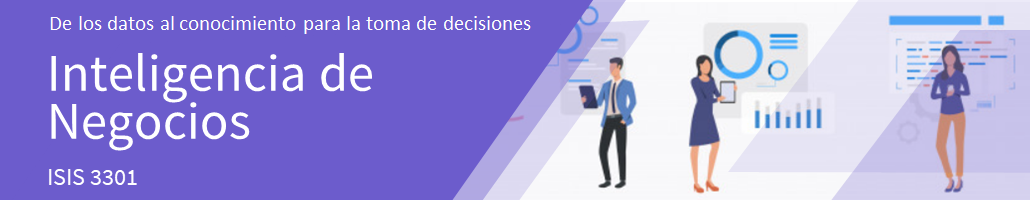

## Tarea de clasificación.

El objetivo de este notebook es mostrar cómo resolvimos la tarea de clustering usando el algoritmo k-means con la librería scikit-learn.

1. Importación de librerías.
2. Carga de los datos.
3. Limpieza de los datos.
4. Creación de un modelo de k-means.
5. Evaluación del modelo.
6. Interpretación del modelo con base en los objetivos de negocio.

### 1. Importación de librerías 

En las siguientes líneas de código se importan las librerías y herramientas necesarias para desarrollar el caso de uso.

In [1]:
# Librerías para manejo de datos
import pandas as pd
pd.set_option('display.max_columns', 25) # Número máximo de columnas a mostrar
pd.set_option('display.max_rows', 50) # Numero máximo de filas a mostar


import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling

from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D # for 3D plots
  
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA

### 2. Carga de los datos
A través de la librería pandas resalizamos la carga de datos del archivo "202120_Laboratorio_2_datos_BancAlpes_credit_card_data.csv". el separador que se usará para la carga es ";".

In [2]:
# Se cargan los datos. 
df=pd.read_csv('202120_Laboratorio_2_datos_BancAlpes_credit_card_data.csv', sep=';', index_col=0)

In [3]:
# Cantidad de datos y número de variables
df.shape

(660, 10)

In [4]:
df.dtypes

Customer               object
Limit_bal              object
Sex                    object
Education              object
Marriage               object
Age                    object
Total_Credit_Cards     object
Total_visits_bank      object
Total_visits_online    object
Total_calls_made       object
dtype: object

Como podemos ver hay datos que deberían ser numéricos, pero por alguna razón estos son tipo "object".

In [5]:
# Mostrar los datos
df.head()

,Customer,Limit_bal,Sex,Education,Marriage,Age,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Id,,,,,,,,,,
1,87073,20000,Female,2,Married,24,2,1,1,0
2,38414,120000,Female,2,Single,26,3,0,10,9
3,17341,90000,Female,2,Single,34,7,1,3,4
4,40496,50000,Female,2,Married,37,5,1,1,?
5,47437,50000,Male,2,Married,57,6,0,12,3


La razón por la que algunos datos son tipo "object", es por un error que hay en los datos, donde ciertas columnas que tienen datos numéricos poseen el caracter "-" o el caracter "?". Este caracter hace que los datos no puedan ser numéricos, por lo que es necesario deshacerse de las filas que poseen este caracter previamente mencionado.

### 3 Limpieza de los datos
A través de la librería pandas resalizamos la carga de datos del archivo "202120_Laboratorio_1_datos_SaludAlpes_diagnosticos_dataset.csv". el separador que se usará para la carga es ";".

In [6]:
indexNames = df[df['Customer'] == '-'].index
df1 = df.drop(indexNames)
df1.shape

(658, 10)

In [7]:
indexNames = df1[df1['Limit_bal'] == '-'].index
df2 = df1.drop(indexNames)
df2.shape

(658, 10)

In [8]:
indexNames = df2[df2['Sex'] == '9'].index
df3 = df2.drop(indexNames)
df3.shape

(657, 10)

In [9]:
indexNames = df3[df3['Sex'] == '-'].index
df4 = df3.drop(indexNames)
df4.shape

(657, 10)

In [10]:
df4["Sex"].replace({"M": "Male", "Mael": "Male"}, inplace=True)
df4.shape

(657, 10)

In [11]:
df4["Sex"].replace({"f": "Female", "F": "Female", "Femael": "Female", "Fmale": "Female"}, inplace=True)
df4.shape

(657, 10)

In [12]:
df4["Education"].replace({"-": "5", "6": "5", "ABC": "5"}, inplace=True)
df4.shape

(657, 10)

In [13]:
indexNames = df4[df4['Marriage'] == '?'].index
df4.drop(indexNames, inplace=True)
df4.shape

(656, 10)

In [14]:
df4["Marriage"].replace({"0": "Others", "1": "Single", "2": "Married"}, inplace=True)
df4.shape

(656, 10)

In [15]:
indexNames = df4[df4['Marriage'] == '-'].index
df4.drop(indexNames, inplace=True)
df4.shape

(656, 10)

In [16]:
indexNames = df4[df4['Age'] == '-'].index
df4.drop(indexNames, inplace=True)
df4.shape

(656, 10)

In [17]:
indexNames = df4[df4['Age'] == '2202'].index
df4.drop(indexNames, inplace=True)
df4.shape

(655, 10)

In [18]:
indexNames = df4[df4['Age'] == '36745'].index
df4.drop(indexNames, inplace=True)
df4.shape

(654, 10)

In [19]:
indexNames = df4[df4['Age'] == '789'].index
df4.drop(indexNames, inplace=True)
df4.shape

(653, 10)

In [20]:
indexNames = df4[df4['Total_Credit_Cards'] == '123456789'].index
df4.drop(indexNames, inplace=True)
df4.shape

(652, 10)

In [21]:
indexNames = df4[df4['Total_Credit_Cards'] == '-'].index
df4.drop(indexNames, inplace=True)
df4.shape

(651, 10)

In [22]:
indexNames = df4[df4['Total_visits_bank'] == '?'].index
df4.drop(indexNames, inplace=True)
df4.shape

(649, 10)

In [23]:
indexNames = df4[df4['Total_visits_bank'] == '-'].index
df4.drop(indexNames, inplace=True)
df4.shape

(649, 10)

In [24]:
indexNames = df4[df4['Total_visits_online'] == '-'].index
df4.drop(indexNames, inplace=True)
df4.shape

(649, 10)

In [25]:
indexNames = df4[df4['Total_calls_made'] == '?'].index
df4.drop(indexNames, inplace=True)
df4.shape

(648, 10)

In [26]:
indexNames = df4[df4['Total_calls_made'] == '-'].index
df4.drop(indexNames, inplace=True)
df4.shape

(648, 10)

In [27]:
dl = df4
dl['Customer']=dl['Customer'].astype(int)
dl['Limit_bal']=dl['Limit_bal'].astype(int)
dl['Education']=dl['Education'].astype(int)
dl['Age']=dl['Age'].astype(int)
dl['Total_Credit_Cards']=dl['Total_Credit_Cards'].astype(int)
dl['Total_visits_bank']=dl['Total_visits_bank'].astype(int)
dl['Total_visits_online']=dl['Total_visits_online'].astype(int)
dl['Total_calls_made']=dl['Total_calls_made'].astype(int)
dl.dtypes

Customer                int32
Limit_bal               int32
Sex                    object
Education               int32
Marriage               object
Age                     int32
Total_Credit_Cards      int32
Total_visits_bank       int32
Total_visits_online     int32
Total_calls_made        int32
dtype: object

Ya tenemos las columnas con los datos numéricos. Lo siguiente es eliminar las columnas que no sirven para el algoritmo DBScan.

In [28]:
dl.isnull().sum()

Customer               0
Limit_bal              0
Sex                    0
Education              0
Marriage               0
Age                    0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

No hay datos nulos en el Data Frame

In [29]:
dl.drop('Sex', axis=1, inplace=True)
dl.drop('Marriage', axis=1, inplace=True)
dl.shape

(648, 8)

Quitaremos las columnas de Sex y Marriage, ya que son categóricas y no sirven para generar clusters de datos.

In [30]:
#Generamos una copia de nuestros datos para normalizarlos
dl_n = dl.copy()
dl_n=(dl_n-dl_n.min())/(dl_n.max()-dl_n.min())

Creamos una copia normalizada de los datos

In [31]:
dl_n.describe()

,Customer,Limit_bal,Education,Age,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,648.000000,648.000000,648.000000,648.000000,648.000000,648.000000,648.000000,648.000000
mean,0.496297,0.258438,0.197531,0.260002,0.415981,0.486111,0.173045,0.352932
std,0.290089,0.208286,0.193464,0.172634,0.240271,0.326176,0.197112,0.284734
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.256130,0.080645,0.000000,0.129630,0.222222,0.200000,0.066667,0.100000
50%,0.481711,0.209677,0.250000,0.222222,0.444444,0.400000,0.133333,0.300000
75%,0.747070,0.370968,0.250000,0.370370,0.555556,0.800000,0.266667,0.500000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 4. Creación de modelos de k-means.
Ya tenemos las columnas necesarias para implementar el algoritmo K-means, lo siguiente será crear dos modelos de K-means: Uno usando dos columnas y otro usando 3. 

In [32]:
dos_cols = ['Total_calls_made','Total_visits_online']
dl_2cols = dl_n[dos_cols]
tres_cols = ['Total_calls_made','Total_visits_online','Total_visits_bank']
dl_3cols = dl_n[tres_cols]

In [33]:
dl_2cols.describe()

,Total_calls_made,Total_visits_online
count,648.000000,648.000000
mean,0.352932,0.173045
std,0.284734,0.197112
min,0.000000,0.000000
25%,0.100000,0.066667
50%,0.300000,0.133333
75%,0.500000,0.266667
max,1.000000,1.000000


In [34]:
dl_3cols.describe()

,Total_calls_made,Total_visits_online,Total_visits_bank
count,648.000000,648.000000,648.000000
mean,0.352932,0.173045,0.486111
std,0.284734,0.197112,0.326176
min,0.000000,0.000000,0.000000
25%,0.100000,0.066667,0.200000
50%,0.300000,0.133333,0.400000
75%,0.500000,0.266667,0.800000
max,1.000000,1.000000,1.000000


Elegimos las columnas que usaremos para cada uno de nuestros dos modelos.Tras experimentar con los diferentes algoritmos llegamos a la conclusion que estas son las columnas de mayor relevancia.

In [35]:
def plot_distortion(data, k_min = 1, k_max = 10, ylabel = 'Distortion',
                    xlabel = 'Number of clusters', title = 'Distortion Plot'):
    distortions = []
    for i in range(k_min, k_max):
        km = KMeans(n_clusters=i,
                 init='k-means++',
                 n_init=10,
                 max_iter=300,
                 random_state=0)
        km.fit(data)
        distortions.append(km.inertia_)
    plt.plot(range(k_min,k_max), distortions, marker='o')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

D:\Users\Felipe\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


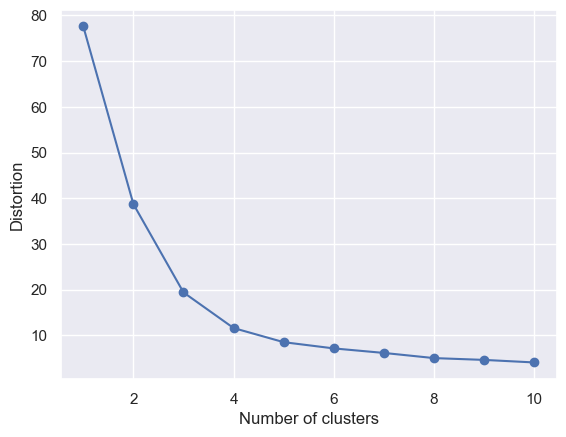

In [36]:
plot_distortion(dl_2cols,1,11)

Vemos que para el modelo en el que usaremos dos columnas elegiremos 3 clusters

D:\Users\Felipe\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


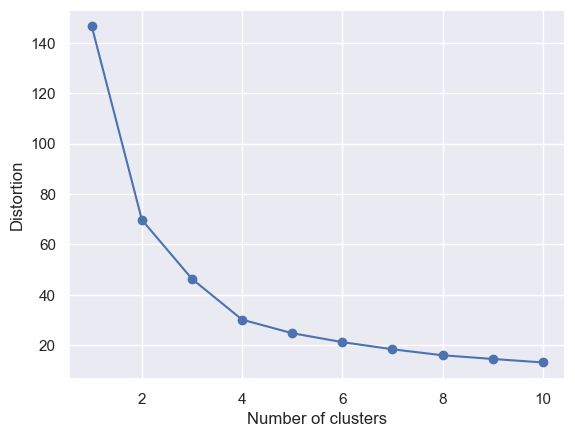

In [37]:
plot_distortion(dl_3cols,1,11)

Para el modelo de tres columnas igualmente elegiremos 3 clusterrs

In [38]:
#Creamos y entrenamos nuestros modelos
N_clusters_2 = 3
N_clusters_3 = 3

kmeans2 = KMeans(n_clusters=N_clusters_2, random_state=0) 
kmeans2 = kmeans2.fit(dl_2cols)

kmeans3 = KMeans(n_clusters=N_clusters_3, random_state=0) 
kmeans3 = kmeans2.fit(dl_3cols)

### 5. Evaluación del modelo

In [39]:
cols_number2 = dl_2cols.to_numpy()
cols_number3 = dl_3cols.to_numpy()

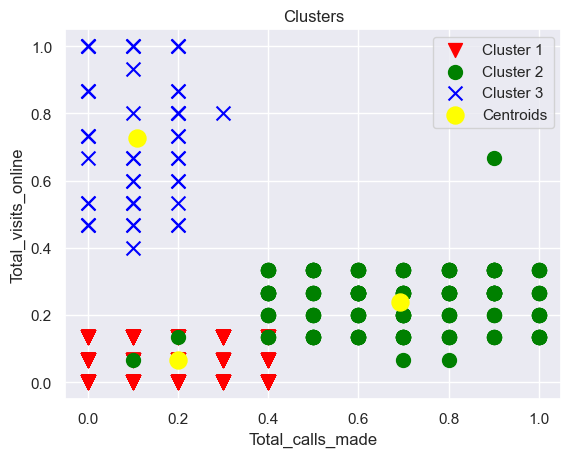

In [40]:
# Primero veremos el modelo con dos columnas
plt.scatter(cols_number2[kmeans2.labels_ == 0, 0], cols_number2[kmeans2.labels_ == 0, 1], s = 100, marker='v', c = 'red', label = 'Cluster 1')
plt.scatter(cols_number2[kmeans2.labels_ == 1, 0], cols_number2[kmeans2.labels_ == 1, 1], s = 100, marker='o', c = 'green', label = 'Cluster 2')
plt.scatter(cols_number2[kmeans2.labels_ == 2, 0], cols_number2[kmeans2.labels_ == 2, 1], s = 100, marker='x', c = 'blue', label = 'Cluster 3')

plt.scatter(kmeans2.cluster_centers_[:, 0], kmeans2.cluster_centers_[:, 1], s = 150, c = 'yellow', label = 'Centroids')
plt.title('Clusters')
plt.xlabel(dos_cols[0])
plt.ylabel(dos_cols[1])
plt.legend()
plt.show()


In [41]:
# Revisemos los valores de los centroides de los clústeres generados
print('Centroides: [[',dos_cols[0], ' ' , dos_cols[1], ']]', kmeans2.cluster_centers_)

Centroides: [[ Total_calls_made   Total_visits_online ]] [[0.20103093 0.06580756 0.69742268]
 [0.69190476 0.23936508 0.18285714]
 [0.108      0.72666667 0.12      ]]


Vemos entonces nuestro modelo de dos columnas como crea 3 cluster y los centroides de cada uno de estos

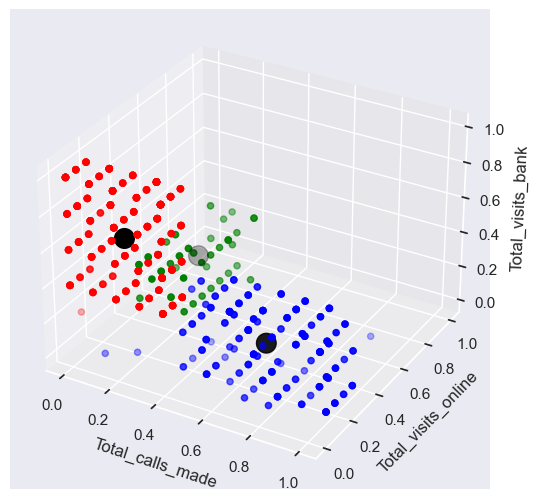

In [42]:
#Creamos una grafica 3d de nuestro modelo
from mpl_toolkits.mplot3d import Axes3D

fig=plt.figure()
ax=Axes3D(fig, auto_add_to_figure = False)
fig.add_axes(ax)
ax.scatter(cols_number3[kmeans3.labels_ == 0, 0], cols_number3[kmeans3.labels_ == 0, 1], cols_number3[kmeans3.labels_ == 0, 2],color='red')
ax.scatter(cols_number3[kmeans3.labels_ == 2, 0], cols_number3[kmeans3.labels_ == 2, 1], cols_number3[kmeans3.labels_ == 2, 2],color='green')
ax.scatter(cols_number3[kmeans3.labels_ == 1, 0], cols_number3[kmeans3.labels_ == 1, 1], cols_number3[kmeans3.labels_ == 1, 2],color='blue')

ax.scatter(kmeans3.cluster_centers_[:, 0],kmeans3.cluster_centers_[:, 1], kmeans3.cluster_centers_[:, 2], color='black',marker='o',s=200, label='centroids')
ax.set_xlabel(tres_cols[0])
ax.set_ylabel(tres_cols[1])
ax.set_zlabel(tres_cols[2])
plt.show()

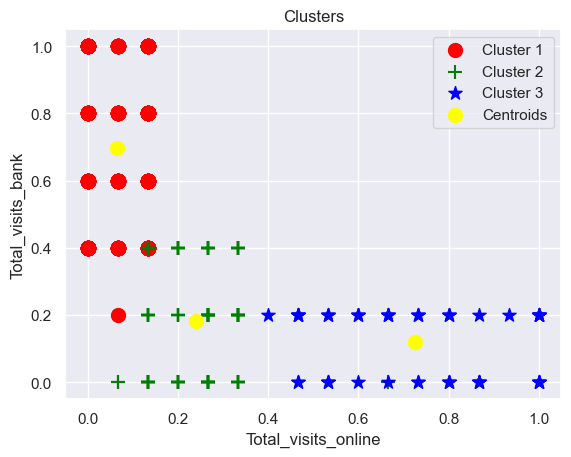

In [43]:

plt.scatter(cols_number3[kmeans3.labels_ == 0, 1], cols_number3[kmeans3.labels_ == 0, 2], s = 100, marker='o', c = 'red', label = 'Cluster 1')
plt.scatter(cols_number3[kmeans3.labels_ == 1, 1], cols_number3[kmeans3.labels_ == 1, 2], s = 100, marker='+', c = 'green', label = 'Cluster 2')
plt.scatter(cols_number3[kmeans3.labels_ == 2, 1], cols_number3[kmeans3.labels_ == 2, 2], s = 100, marker='*', c = 'blue', label = 'Cluster 3')

plt.scatter(kmeans3.cluster_centers_[:, 1], kmeans3.cluster_centers_[:, 2], s = 100, c = 'yellow', label = 'Centroids')
plt.title('Clusters')
plt.xlabel(tres_cols[1])
plt.ylabel(tres_cols[2])
plt.legend()
plt.show()

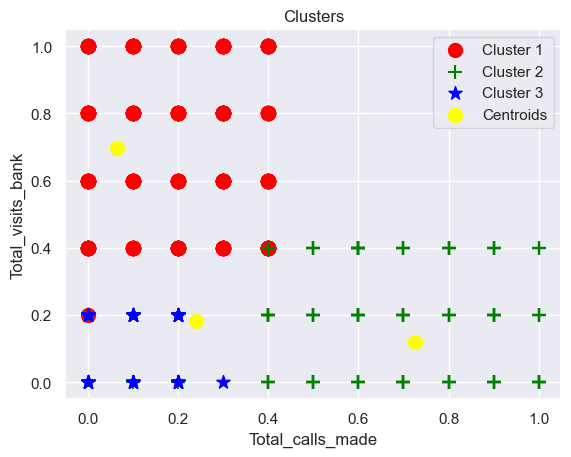

In [44]:
plt.scatter(cols_number3[kmeans3.labels_ == 0, 0], cols_number3[kmeans3.labels_ == 0, 2], s = 100, marker='o', c = 'red', label = 'Cluster 1')
plt.scatter(cols_number3[kmeans3.labels_ == 1, 0], cols_number3[kmeans3.labels_ == 1, 2], s = 100, marker='+', c = 'green', label = 'Cluster 2')
plt.scatter(cols_number3[kmeans3.labels_ == 2, 0], cols_number3[kmeans3.labels_ == 2, 2], s = 100, marker='*', c = 'blue', label = 'Cluster 3')

plt.scatter(kmeans3.cluster_centers_[:, 1], kmeans3.cluster_centers_[:, 2], s = 100, c = 'yellow', label = 'Centroids')
plt.title('Clusters')
plt.xlabel(tres_cols[0])
plt.ylabel(tres_cols[2])
plt.legend()
plt.show()

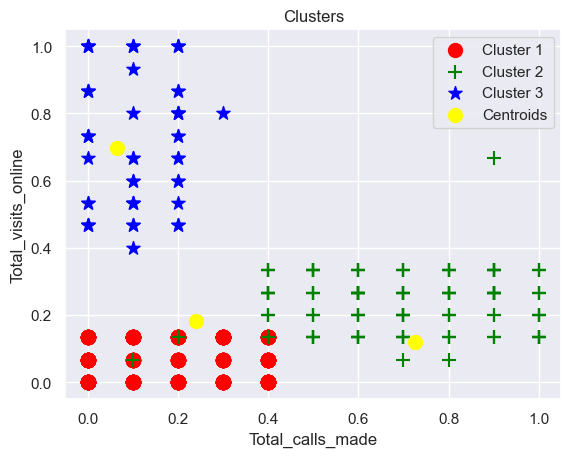

In [45]:
plt.scatter(cols_number3[kmeans3.labels_ == 0, 0], cols_number3[kmeans3.labels_ == 0, 1], s = 100, marker='o', c = 'red', label = 'Cluster 1')
plt.scatter(cols_number3[kmeans3.labels_ == 1, 0], cols_number3[kmeans3.labels_ == 1, 1], s = 100, marker='+', c = 'green', label = 'Cluster 2')
plt.scatter(cols_number3[kmeans3.labels_ == 2, 0], cols_number3[kmeans3.labels_ == 2, 1], s = 100, marker='*', c = 'blue', label = 'Cluster 3')

plt.scatter(kmeans3.cluster_centers_[:, 1], kmeans3.cluster_centers_[:, 2], s = 100, c = 'yellow', label = 'Centroids')
plt.title('Clusters')
plt.xlabel(tres_cols[0])
plt.ylabel(tres_cols[1])
plt.legend()
plt.show()

### 6.Interpretación del modelo con base en los objetivos de negocio.
Ahora vamos a realizar la calidad de cada uno de los clusteres obtenidos tanto apra el caso de dos como tres columnas.

In [46]:
#Creamos una función basada en el concepto de silueta
def plot_silhouette(data, 
                    labels,
                   ylabel = 'Clústeres',
                   xlabel = "Silhouette coefficient",
                   title = 'Silhouette Plot'):
    cluster_labels = np.unique(labels)
    print(cluster_labels)
    n_clusters = cluster_labels.shape[0]
    silhouette_vals = silhouette_samples(data,
                                        labels,
                                        metric='euclidean')
    y_ax_lower, y_ax_upper = 0, 0
    yticks = []
    for i, c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[labels == c]
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)
        color = cm.jet(float(i) / n_clusters)
        plt.barh(range(y_ax_lower, y_ax_upper),
                        c_silhouette_vals,
                        height=1.0,
                        edgecolor='none',
                        color=color)
        yticks.append((y_ax_lower + y_ax_upper) / 2.)
        y_ax_lower += len(c_silhouette_vals)
    silhouette_avg = np.mean(silhouette_vals)
    plt.axvline(silhouette_avg,
                color="red",
                linestyle="--")
    plt.yticks(yticks, cluster_labels+1)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.title(title)
    plt.show()

[0 1 2]


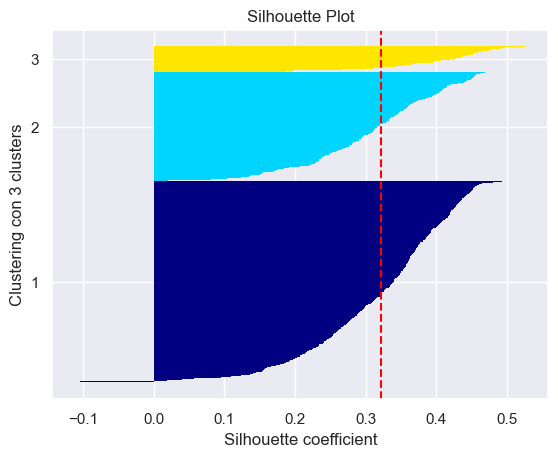

In [47]:
plot_silhouette(data = dl_n, 
                labels = kmeans2.labels_, 
                ylabel = 'Clustering con 3 clusters')

[0 1 2]


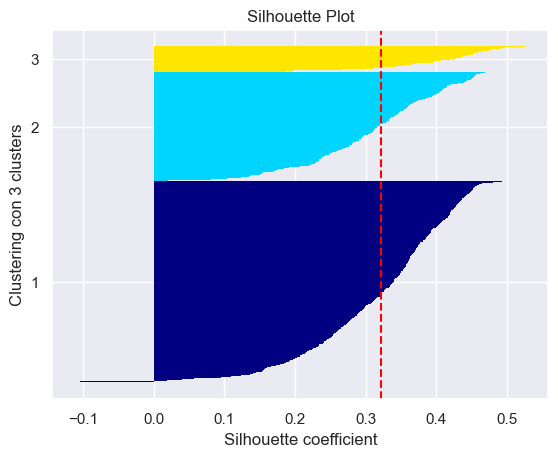

In [48]:
plot_silhouette(data = dl_n, 
                labels = kmeans3.labels_, 
                ylabel = 'Clustering con 3 clusters')